# *****ML labs - report *****

 <br/>Students : Théo Fontana - Vatosoa Razafiniary - 4IR SC
 <br/>Github  access : https://github.com/Vatosoa285/TP_ML.git 
 <br/>This report gathers the work done in the labs of the machine learning course. It has 3 parts that corresponds to the different labs seen :
- lab 1: decision trees
- lab 2: Perceptron 
- lab 3: multi-layer perceptron 

<br/>The instructions of the labs being quite directive, we took the time to consult the resources provided (about maching learning notions or Python functions) in addition to our courses to carry out and understand the labs.
For an easy understanding for the reader, we have put explanatory comments in our codes and displayed the results at runtime.

# Lab 1 Evaluation

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

In [1]:
#usefull libraries 
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees

import csv
import numpy as np
from utils import load_from_csv

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
train_examples, train_labels, features, prediction = load_from_csv("./compass.csv") 
print ("We can see here that we work with binarized data :\n",train_examples, "\n-------\n",train_labels)

We can see here that we work with binarized data :
 [[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]] 
-------
 [1 0 0 ... 1 0 1]


A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics 

In [3]:
#our proposition : affecting different values for the parameters splitter, max_depth and min_samples_leaf 
treesParmeters = [
    #expected topology and caracteristic
    {'splitter':'best', 'max_depth': 2, 'min_samples_leaf': 1},
    {'splitter':'random', 'max_depth': 10, 'min_samples_leaf': 100},
    {'splitter':'best', 'max_depth': 5, 'min_samples_leaf': 20},
    {'splitter':'best', 'max_depth': 5, 'min_samples_leaf':5},
    {'splitter':'best', 'max_depth': 10, 'min_samples_leaf':10},
    {'splitter':'best', 'max_depth': 100, 'min_samples_leaf':60},
]
nbTree = len(treesParmeters)
print("We have configured :", nbTree, "different decision trees here")

We have configured : 6 different decision trees here


Train a decision tree for each of the previous configurations on the full dataset

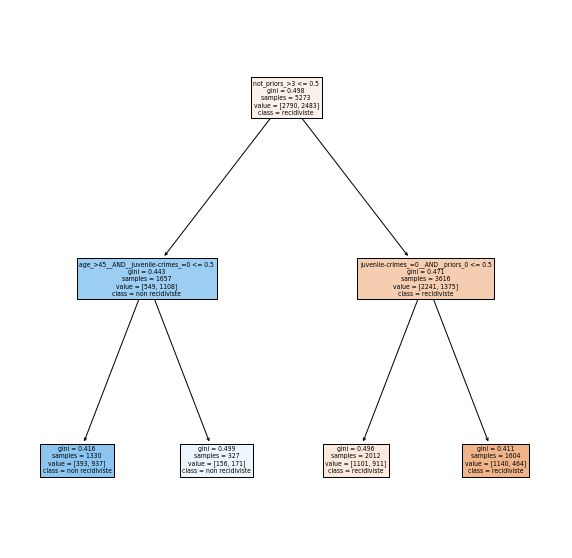

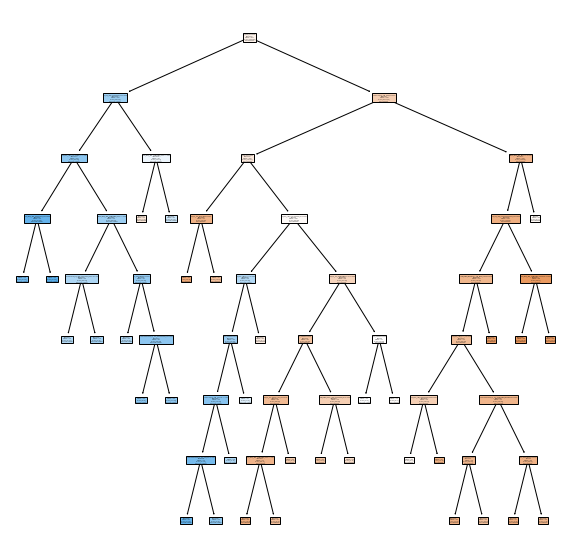

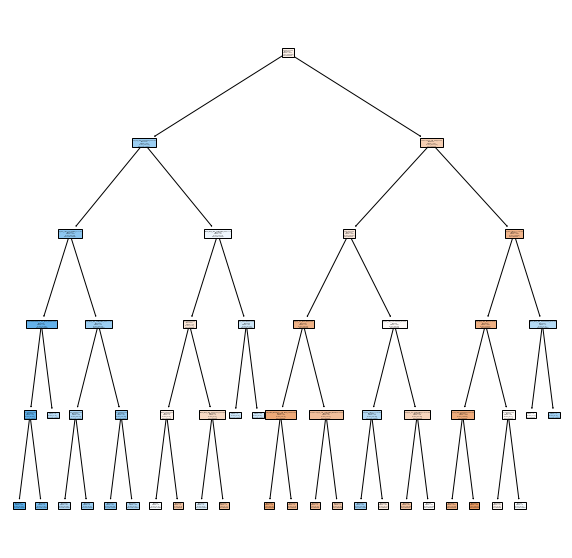

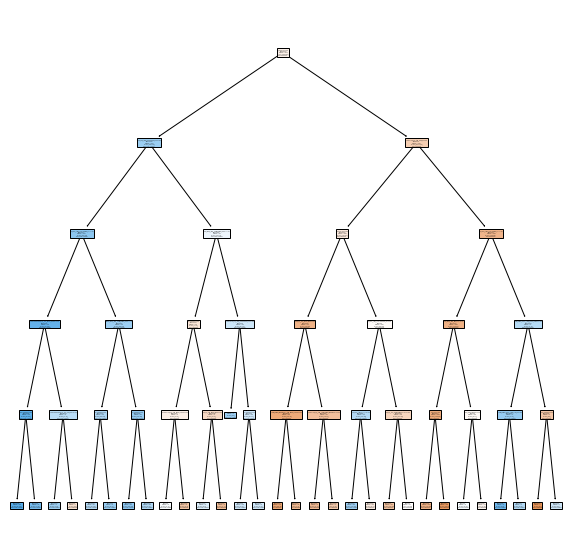

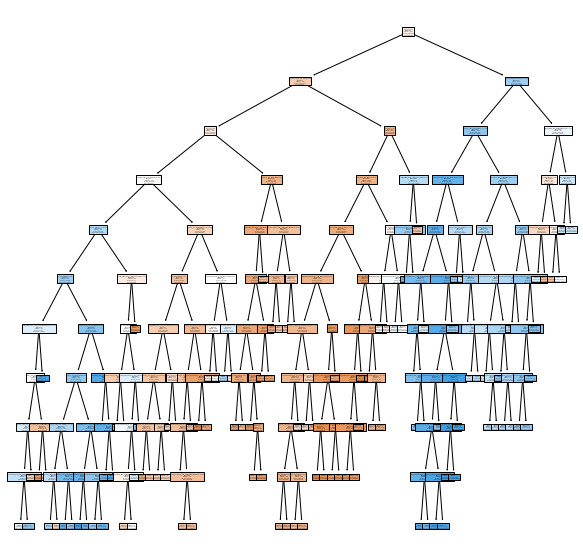

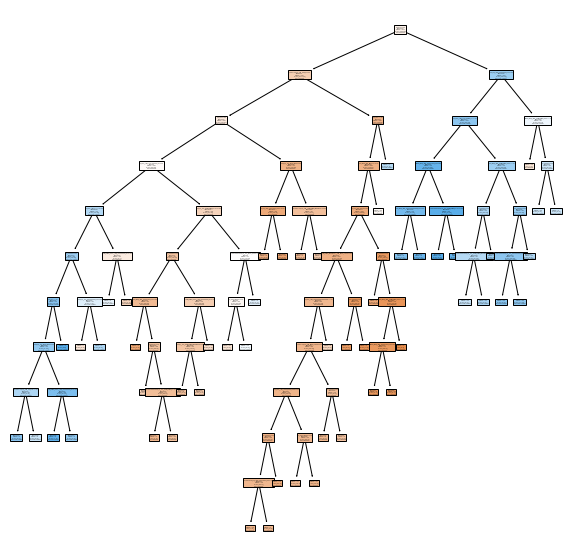

In [4]:
for i in range (nbTree) :
    parameters= treesParmeters[i]
    clf = tree.DecisionTreeClassifier( #while creating each tree, we work with the parameters configured above
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    clf = clf.fit(train_examples, train_labels)   
    plt.figure(figsize=(10,10))
    tree.plot_tree(clf, 
                       feature_names= (features),
                       class_names= ("recidiviste", "non recidiviste"), 
                       filled=True)
    plt.show()
    # Result : we can visually check that we obtain 6 different trees
    #Each tree is coherent with the expected topology and characteristic parametered 

Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [5]:
# We kept the two first topologies
treesParmeters = treesParmeters[:2]
nbTree = len(treesParmeters)

The tree number 00 has 0.65 accuracy with a standard deviation of 0.03


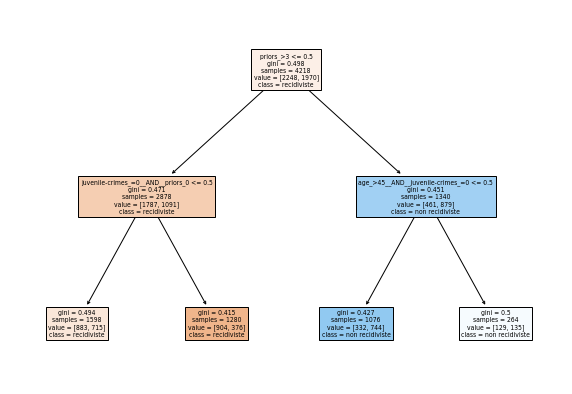

The tree number 01 has 0.65 accuracy with a standard deviation of 0.02


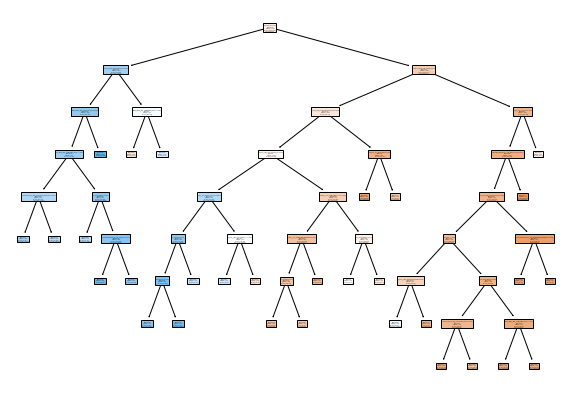

In [6]:
for i in range (nbTree) :
    parameters= treesParmeters[i]
    clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)

    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=5)
    print("The tree number %0.2i has %0.2f accuracy with a standard deviation of %0.2f" % (i,scores.mean(), scores.std()))
    plt.figure(figsize=(10,7))
    tree.plot_tree(clf, 
                       feature_names= (features),
                       class_names= ("recidiviste", "non recidiviste"), 
                       filled=True)
    plt.show()

Propose an experimental study that shows the transition phase from underfitting to overfitting 

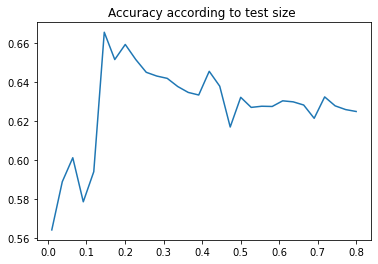

In [7]:
parameters= treesParmeters[0]
acuracy =[]
test_sizes=np.linspace(0.01,0.8,30)
for test_size in test_sizes :
    clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
    X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=test_size, random_state=42)

    clf = clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=2)
    acuracy.append(scores.mean())
    #print(f"for a test size of {1/i} we have an accuracy of {scores.mean()} with a standard deviation of {scores.std()}")
plt.title('Accuracy according to test size ')
plt.plot(test_sizes,acuracy)
plt.show()

### Interpretation 
* we reach a maximal accuracy around 0.67 for a  0.15 <test_size_ref< 0.19 (slitghly inferior to 0.2)
* With small tests size, we have bad result because our graph is to close of our data (< test_size_ref)
    - **this is overfitting**
* With high tests size, our results start to be be lower because the graph is constructed with too few data
    - **this is underfitting**

Construct the confusion matrix on a particular good configuration (after explaining your choice)

Accuracy of the model :  0.6718009478672986
Confusion matrix


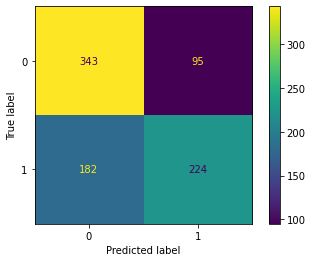

In [8]:
test_size = 0.16 #according to the previous analysis we will set this value to test_size 

X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=test_size, random_state=1)
parameters= treesParmeters[1] #according to resutls in [entry 9], we will keep tree 1 for this  experiment (having the best standard deviation)

clf = tree.DecisionTreeClassifier(
        splitter=parameters['splitter'],
        max_depth =parameters['max_depth'],
        min_samples_leaf =parameters['min_samples_leaf']
    )
clf = clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy of the model : ",accuracy_score(y_test,y_predict))

#confusion_matrix
print("Confusion matrix")
conf_mx = confusion_matrix(y_test,y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mx,display_labels=clf.classes_)

disp.plot()
plt.show()

Provide an evaluation of the fairness of the model based on the False Positive Rate

In [9]:
print("% of prisoners correctly predicted recidivist ou not by our model :", (conf_mx[0,0]+conf_mx[1,1])/len(y_test)*100, "%")
print(" % of recidivist prisoners correctly predicted recidivist our model :",conf_mx[0,0]/(conf_mx[0,0]+conf_mx[1,0])*100,"%")
print("% of non-recidivist prisoners correctly predicted non-recidivist our model :",conf_mx[1,1]/(conf_mx[0,1]+conf_mx[1,1])*100,"%")

% of prisoners correctly predicted recidivist ou not by our model : 67.18009478672985 %
 % of recidivist prisoners correctly predicted recidivist our model : 65.33333333333333 %
% of non-recidivist prisoners correctly predicted non-recidivist our model : 70.21943573667711 %


We can see that our model has an accuracy of 67.10% which is pretty average. Based on the two last percentages (true recidivists and true non-recidivists) our model is not fair because it predicts with lower accuracy the recidivists (65.33%) compared to the non-ones(70.21%)

--> A possibility is to reaching a more fair model is to increase gradually the value of test_size beetween 0.16 to 0.25 for example according to the figure in [entry 29]. 